In [1]:
import pandas as pd


In [2]:
data = pd.read_csv('/content/Titanic-Dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 1. Generate summary statistics
print("Summary statistics:")
print(data.describe(include='all'))


Summary statistics:
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   714

In [6]:
# 2. Histograms for numeric features
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

In [7]:
print(numeric_cols)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')



Creating histograms...


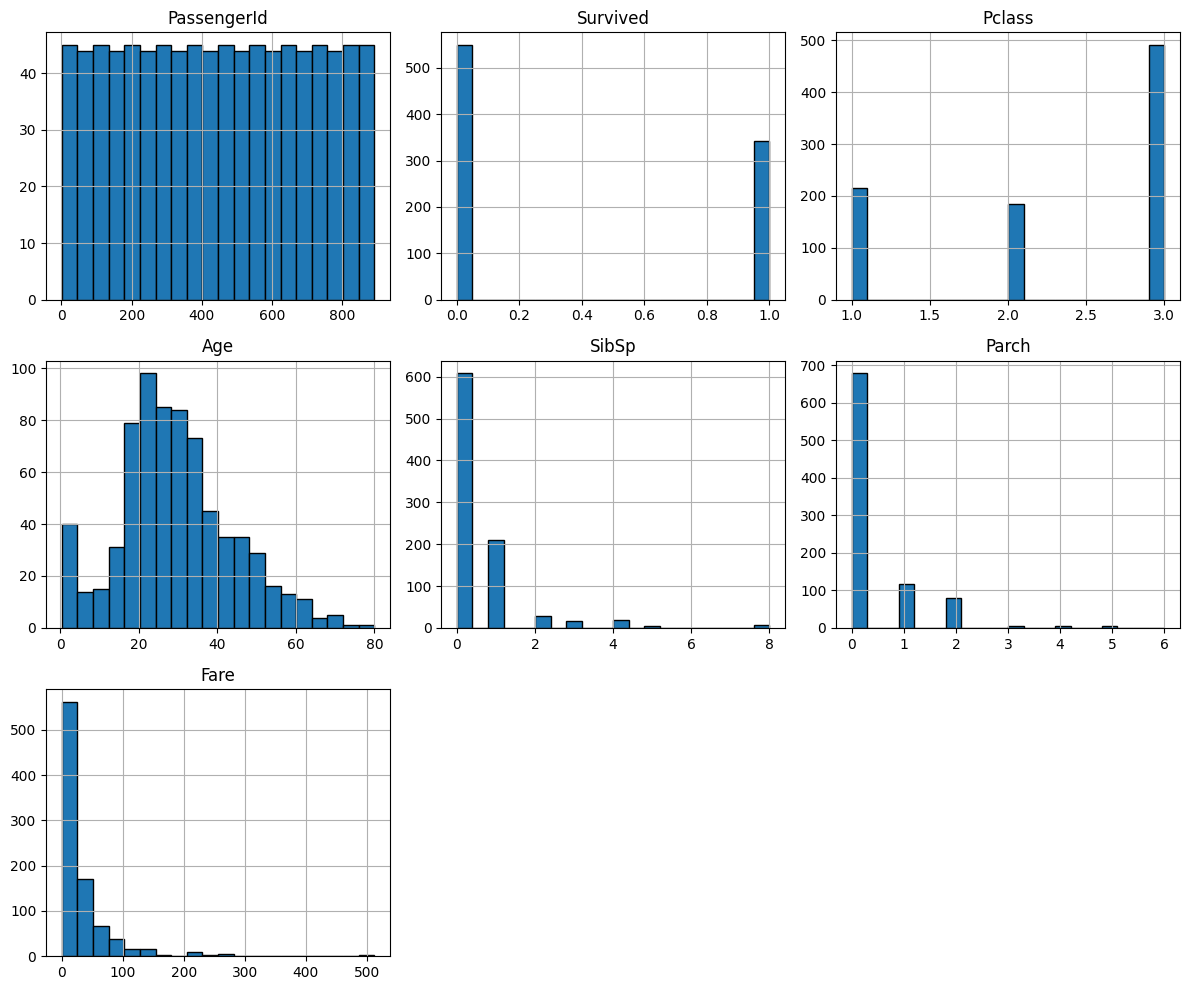

In [8]:
print("\nCreating histograms...")
data[numeric_cols].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()


Creating boxplots...


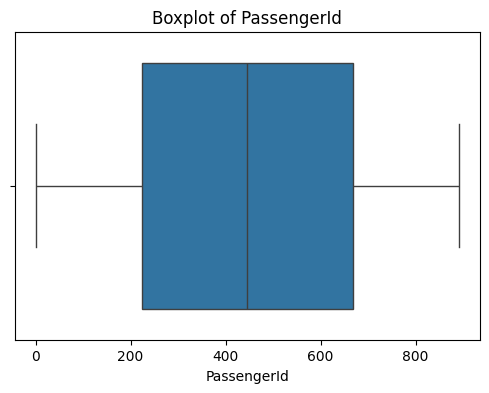

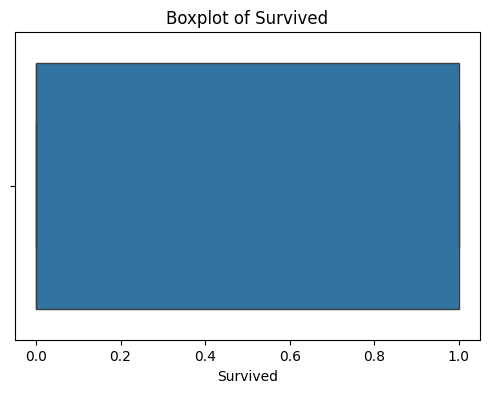

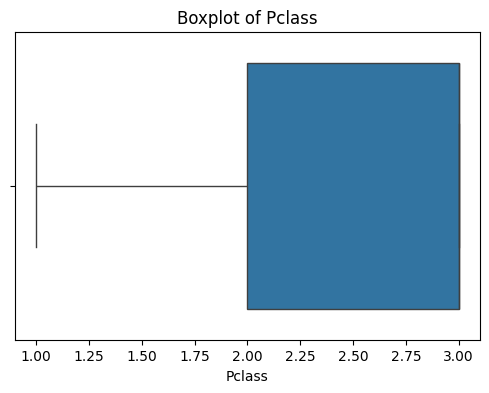

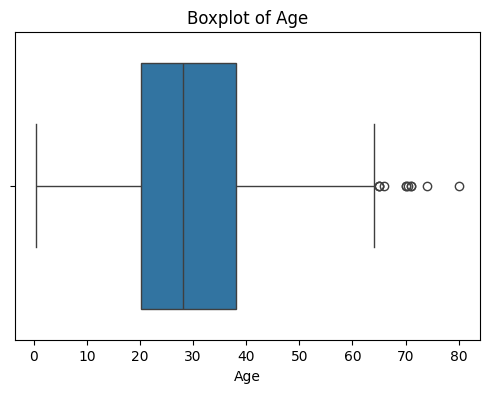

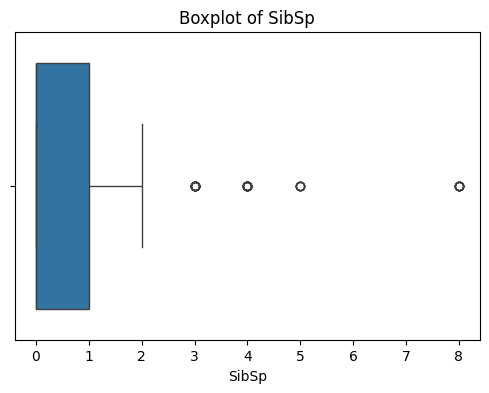

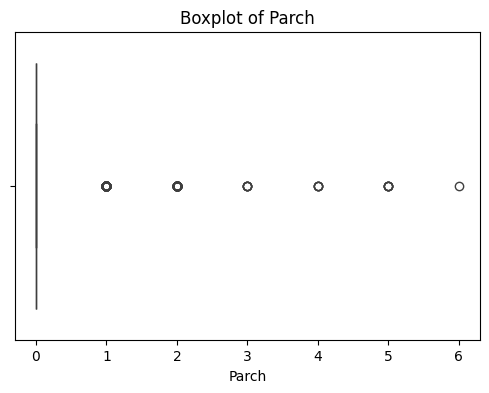

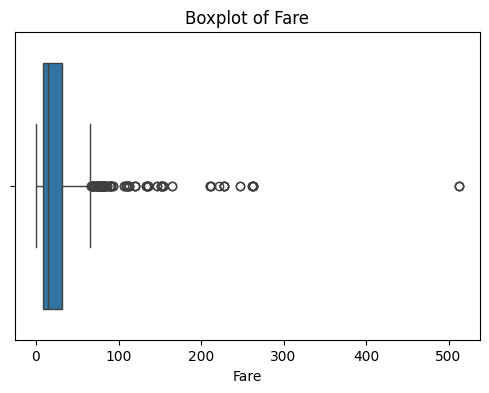

In [9]:
# Boxplots
print("\nCreating boxplots...")
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


Correlation Matrix:


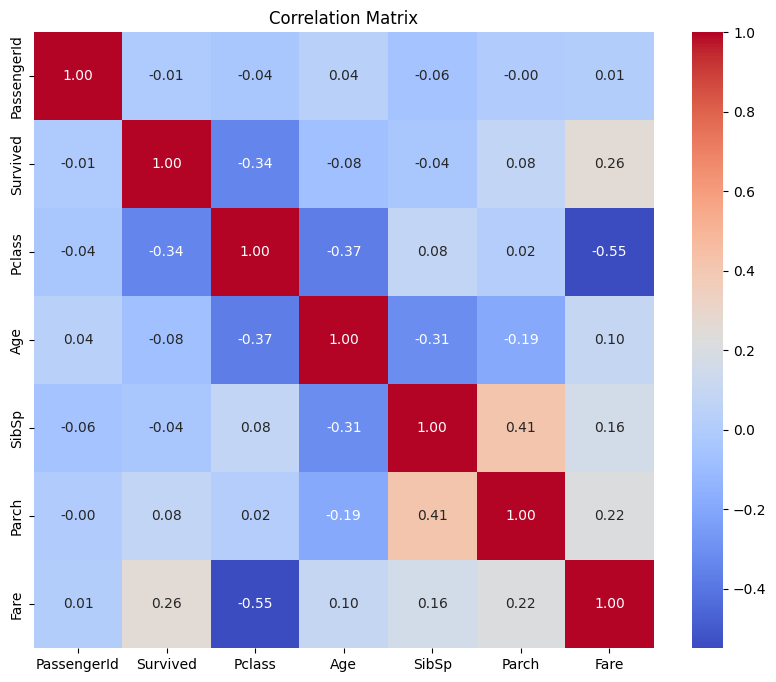


Pairplot:


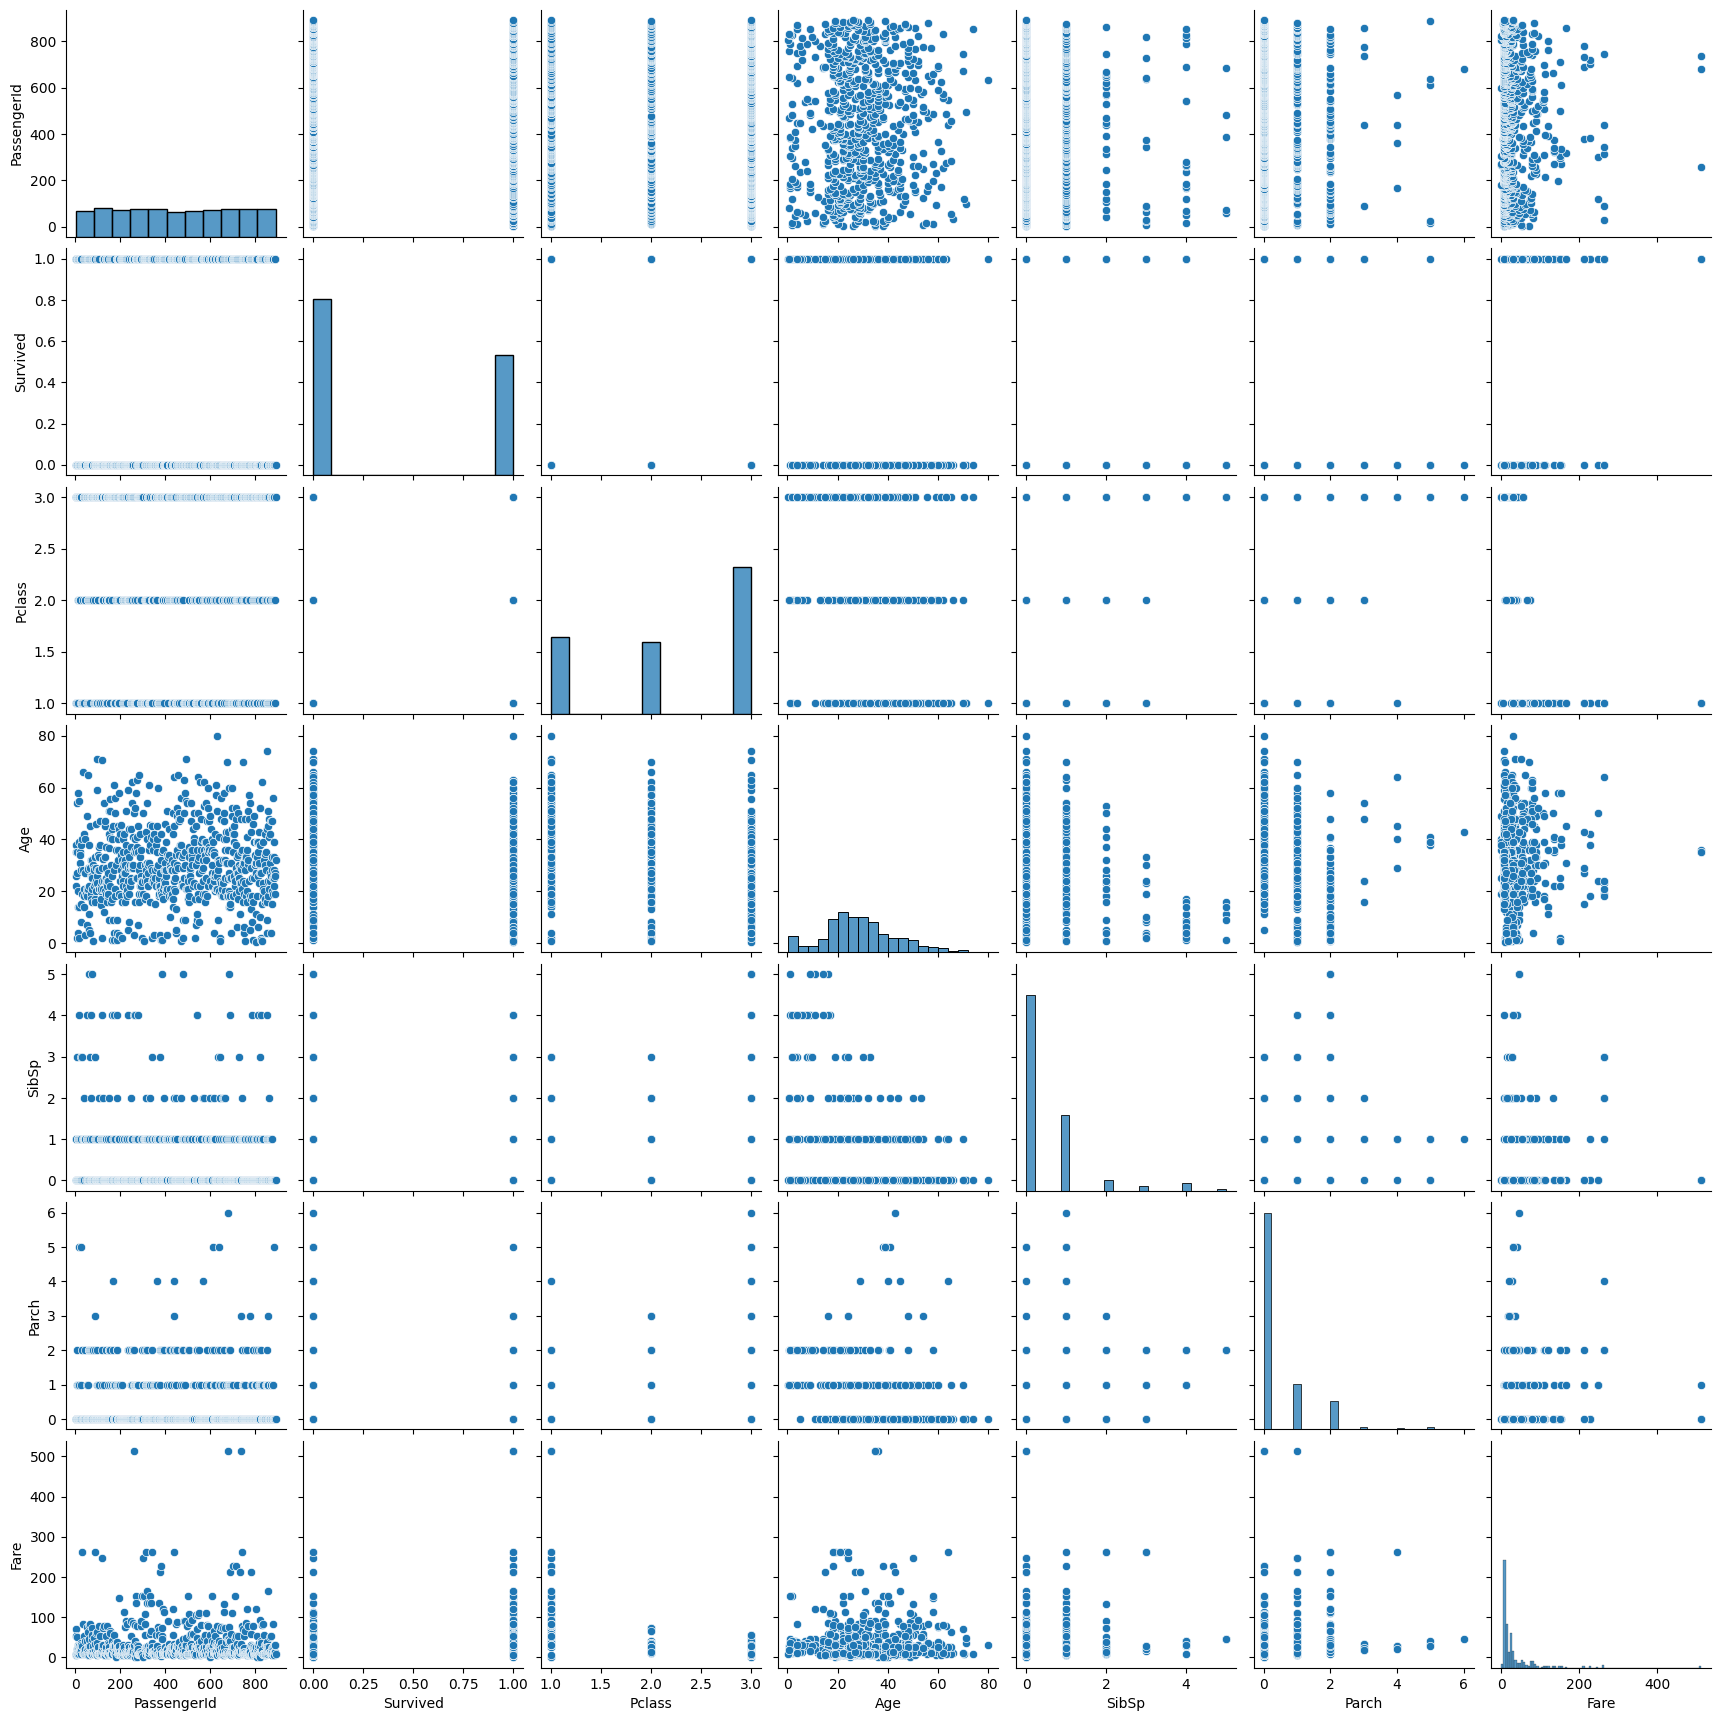

In [10]:
# 3. Pairplot & Correlation Matrix
print("\nCorrelation Matrix:")
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

print("\nPairplot:")
sns.pairplot(data[numeric_cols].dropna())
plt.show()


Survival count by Sex:


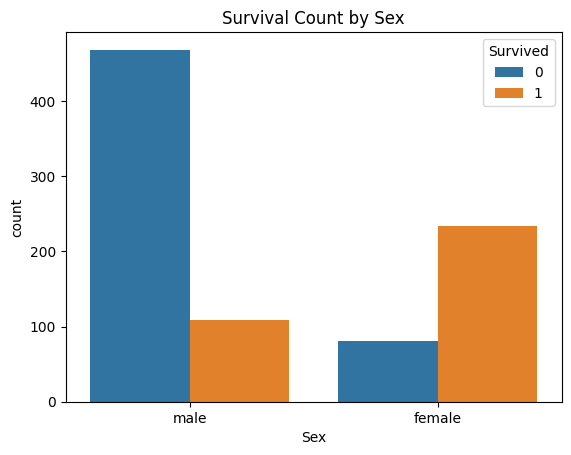

In [11]:
# 4. Identify patterns, trends, or anomalies

print("\nSurvival count by Sex:")
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival Count by Sex')
plt.show()


Age distribution by Survival:


<ipython-input-12-3be2c803bfda>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Survived'] == 1]['Age'].dropna(), label='Survived', shade=True)
<ipython-input-12-3be2c803bfda>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Survived'] == 0]['Age'].dropna(), label='Not Survived', shade=True)


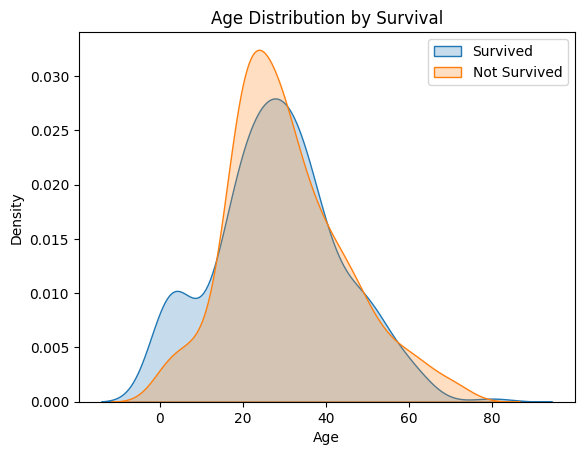

In [12]:
# Age distribution by survival
print("\nAge distribution by Survival:")
sns.kdeplot(data=data[data['Survived'] == 1]['Age'].dropna(), label='Survived', shade=True)
sns.kdeplot(data=data[data['Survived'] == 0]['Age'].dropna(), label='Not Survived', shade=True)
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()